In [ ]:
import pandas as pd

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
filename = '/content/drive/My Drive/historical_data.csv'
df = pd.read_csv(filename)

## ABOUT DATA (from Kaggle)

When a consumer places an order on DoorDash, we show the expected time of delivery. It is very important for DoorDash to get this right, as it has a big impact on consumer experience. In this exercise, you will build a model to predict the estimated time taken for a delivery.

Concretely, for a given delivery you must predict the total delivery duration seconds , i.e., the time taken from

Start: the time consumer submits the order (created_at) to
End: when the order will be delivered to the consumer (actual_delivery_time)

Data Description
The attached file historical_data.csv contains a subset of deliveries received at DoorDash in early 2015 in a subset of the cities. Each row in this file corresponds to one unique delivery. We have added noise to the dataset to obfuscate certain business details. Each column corresponds to a feature as explained below. Note all money (dollar) values given in the data are in cents and all time duration values given are in seconds

The target value to predict here is the total seconds value between created_at and actual_delivery_time.

Columns in historical_data.csv

Time features
market_id: A city/region in which DoorDash operates, e.g., Los Angeles, given in the data as an id

created_at: Timestamp in UTC when the order was submitted by the consumer to DoorDash. (Note this timestamp is in UTC, but in case you need it, the actual timezone of the region was US/Pacific)

actual_delivery_time: Timestamp in UTC when the order was delivered to the consumer

Store features
store_id: an id representing the restaurant the order was submitted for

store_primary_category: cuisine category of the restaurant, e.g., italian, asian

order_protocol: a store can receive orders from DoorDash through many modes. This field represents an id denoting the protocol

Order features
total_items: total number of items in the order

subtotal: total value of the order submitted (in cents)

num_distinct_items: number of distinct items included in the order

min_item_price: price of the item with the least cost in the order (in cents)

max_item_price: price of the item with the highest cost in the order (in cents)

Market features
DoorDash being a marketplace, we have information on the state of marketplace when the order is placed, that can be used to estimate delivery time. The following features are values at the time of created_at (order submission time):

total_onshift_dashers: Number of available dashers who are within 10 miles of the store at the time of order creation

total_busy_dashers: Subset of above total_onshift_dashers who are currently working on an order

total_outstanding_orders: Number of orders within 10 miles of this order that are currently being processed.

Predictions from other models
We have predictions from other models for various stages of delivery process that we can use:
estimated_order_place_duration: Estimated time for the restaurant to receive the order from DoorDash (in seconds)

estimated_store_to_consumer_driving_duration: Estimated travel time between store and consumer (in seconds)

## Exploratory Data Analysis

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 197428 entries, 0 to 197427
Data columns (total 16 columns):
 #   Column                                        Non-Null Count   Dtype  
---  ------                                        --------------   -----  
 0   market_id                                     196441 non-null  float64
 1   created_at                                    197428 non-null  object 
 2   actual_delivery_time                          197421 non-null  object 
 3   store_id                                      197428 non-null  int64  
 4   store_primary_category                        192668 non-null  object 
 5   order_protocol                                196433 non-null  float64
 6   total_items                                   197428 non-null  int64  
 7   subtotal                                      197428 non-null  int64  
 8   num_distinct_items                            197428 non-null  int64  
 9   min_item_price                                19

In [ ]:
df.head()

,market_id,created_at,actual_delivery_time,store_id,store_primary_category,order_protocol,total_items,subtotal,num_distinct_items,min_item_price,max_item_price,total_onshift_dashers,total_busy_dashers,total_outstanding_orders,estimated_order_place_duration,estimated_store_to_consumer_driving_duration
0,1.0,2015-02-06 22:24:17,2015-02-06 23:27:16,1845,american,1.0,4,3441,4,557,1239,33.0,14.0,21.0,446,861.0
1,2.0,2015-02-10 21:49:25,2015-02-10 22:56:29,5477,mexican,2.0,1,1900,1,1400,1400,1.0,2.0,2.0,446,690.0
2,3.0,2015-01-22 20:39:28,2015-01-22 21:09:09,5477,NaN,1.0,1,1900,1,1900,1900,1.0,0.0,0.0,446,690.0
3,3.0,2015-02-03 21:21:45,2015-02-03 22:13:00,5477,NaN,1.0,6,6900,5,600,1800,1.0,1.0,2.0,446,289.0
4,3.0,2015-02-15 02:40:36,2015-02-15 03:20:26,5477,NaN,1.0,3,3900,3,1100,1600,6.0,6.0,9.0,446,650.0


In [ ]:
df.isnull().sum()

market_id                                         987
created_at                                          0
actual_delivery_time                                7
store_id                                            0
store_primary_category                           4760
order_protocol                                    995
total_items                                         0
subtotal                                            0
num_distinct_items                                  0
min_item_price                                      0
max_item_price                                      0
total_onshift_dashers                           16262
total_busy_dashers                              16262
total_outstanding_orders                        16262
estimated_order_place_duration                      0
estimated_store_to_consumer_driving_duration      526
dtype: int64

In [ ]:
# although we may lose relevant information, for simplicity we will drop all the null rows
df = df.dropna()

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 175777 entries, 0 to 197427
Data columns (total 16 columns):
 #   Column                                        Non-Null Count   Dtype  
---  ------                                        --------------   -----  
 0   market_id                                     175777 non-null  float64
 1   created_at                                    175777 non-null  object 
 2   actual_delivery_time                          175777 non-null  object 
 3   store_id                                      175777 non-null  int64  
 4   store_primary_category                        175777 non-null  object 
 5   order_protocol                                175777 non-null  float64
 6   total_items                                   175777 non-null  int64  
 7   subtotal                                      175777 non-null  int64  
 8   num_distinct_items                            175777 non-null  int64  
 9   min_item_price                                175777 

In [ ]:
df.isnull().sum()

market_id                                       0
created_at                                      0
actual_delivery_time                            0
store_id                                        0
store_primary_category                          0
order_protocol                                  0
total_items                                     0
subtotal                                        0
num_distinct_items                              0
min_item_price                                  0
max_item_price                                  0
total_onshift_dashers                           0
total_busy_dashers                              0
total_outstanding_orders                        0
estimated_order_place_duration                  0
estimated_store_to_consumer_driving_duration    0
dtype: int64

In [ ]:
# the created_at and actual_delivery_time are dates;  let's convert them
df['created_at'] = pd.to_datetime(df['created_at'])
df['actual_delivery_time'] = pd.to_datetime(df['actual_delivery_time'])

In [ ]:
# our target is actual duration
df['actual_duration'] = (df['actual_delivery_time'] - df['created_at']).dt.total_seconds()

In [ ]:
df.head(5)

,market_id,created_at,actual_delivery_time,store_id,store_primary_category,order_protocol,total_items,subtotal,num_distinct_items,min_item_price,max_item_price,total_onshift_dashers,total_busy_dashers,total_outstanding_orders,estimated_order_place_duration,estimated_store_to_consumer_driving_duration,actual_duration
0,1.0,2015-02-06 22:24:17,2015-02-06 23:27:16,1845,american,1.0,4,3441,4,557,1239,33.0,14.0,21.0,446,861.0,3779.0
1,2.0,2015-02-10 21:49:25,2015-02-10 22:56:29,5477,mexican,2.0,1,1900,1,1400,1400,1.0,2.0,2.0,446,690.0,4024.0
8,2.0,2015-02-16 00:11:35,2015-02-16 00:38:01,5477,indian,3.0,4,4771,3,820,1604,8.0,6.0,18.0,446,289.0,1586.0
14,1.0,2015-02-12 03:36:46,2015-02-12 04:14:39,2841,italian,1.0,1,1525,1,1525,1525,5.0,6.0,8.0,446,795.0,2273.0
15,1.0,2015-01-27 02:12:36,2015-01-27 03:02:24,2841,italian,1.0,2,3620,2,1425,2195,5.0,5.0,7.0,446,205.0,2988.0


### Mutual Information

In [ ]:
from sklearn.metrics import mutual_info_score

In [ ]:
def mutual_info_duration_score(series):
    return mutual_info_score(series, df.actual_duration)

In [ ]:
numerical = ['max_item_price', 'min_item_price', 'subtotal', 'total_items', 'num_distinct_items', 'max_item_price', 'min_item_price', 'total_onshift_dashers', 'total_busy_dashers', 'total_outstanding_orders']

In [ ]:
categorical = ['market_id', 'store_id', 'store_primary_category', 'order_protocol']

In [ ]:
mi = df[categorical].apply(mutual_info_duration_score)
mi.sort_values(ascending=False)

store_id                  3.973080
store_primary_category    0.546847
order_protocol            0.097842
market_id                 0.092433
dtype: float64

### Correlation (for continuous variables)

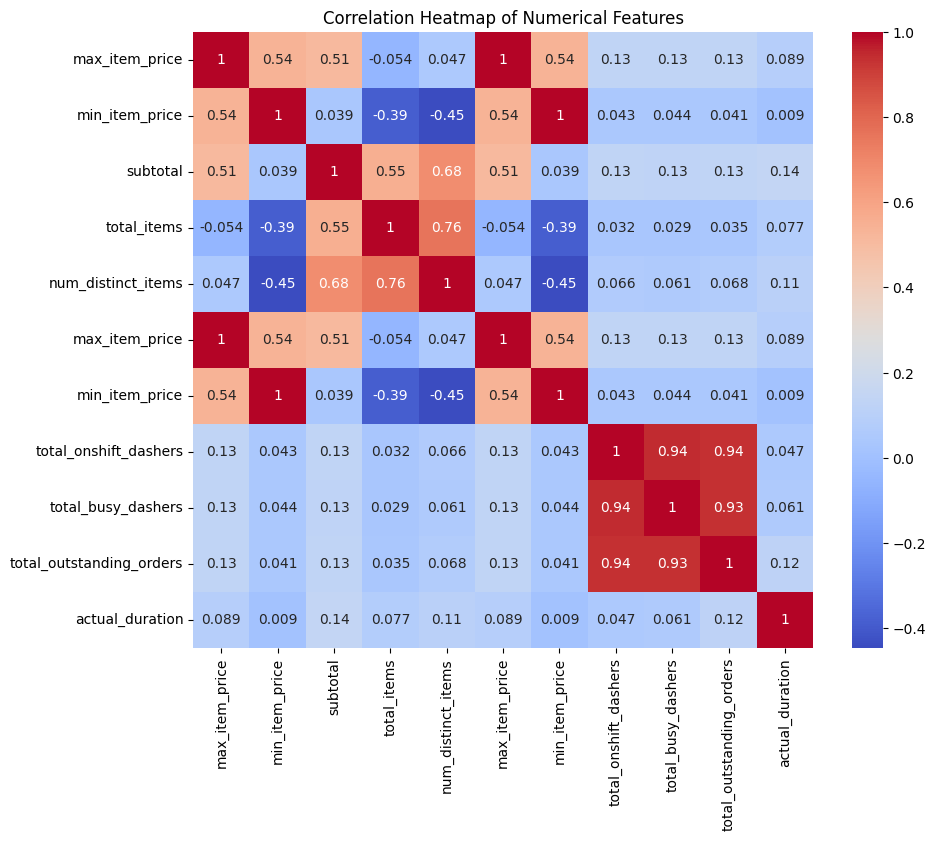

In [ ]:
import seaborn as sns
import matplotlib.pyplot as plt
# calculate the correlation matrix
corr = df[numerical + ['actual_duration']].corr()

# plot the heatmap
plt.figure(figsize=(10, 8))
sns.heatmap(corr, annot=True, cmap='coolwarm')
plt.title('Correlation Heatmap of Numerical Features')
plt.show()


## Validation Framework

In [ ]:
from sklearn.model_selection import train_test_split

In [ ]:
df_full_train, df_test = train_test_split(df, test_size=0.2, random_state=1)
df_train, df_val = train_test_split(df_full_train, test_size=0.25, random_state=1)

In [ ]:
len(df_train), len(df_val), len(df_test)

(105465, 35156, 35156)

In [ ]:
df_train = df_train.reset_index(drop=True)
df_val = df_val.reset_index(drop=True)
df_test = df_test.reset_index(drop=True)

In [ ]:
y_train = df_train.actual_duration.values
y_val = df_val.actual_duration.values
y_test = df_test.actual_duration.values

del df_train['actual_duration']
del df_val['actual_duration']
del df_test['actual_duration']

df_train.shape, df_val.shape, df_test.shape

((105465, 16), (35156, 16), (35156, 16))

## One-Hot Encoding

In [ ]:
from sklearn.feature_extraction import DictVectorizer

In [ ]:
dv = DictVectorizer(sparse=False)

train_dict = df_train[categorical + numerical].to_dict(orient='records')
X_train = dv.fit_transform(train_dict)

val_dict = df_val[categorical + numerical].to_dict(orient='records')
X_val = dv.transform(val_dict)

<ipython-input-36-19d8973ccd2c>:3: UserWarning: DataFrame columns are not unique, some columns will be omitted.
  train_dict = df_train[categorical + numerical].to_dict(orient='records')
<ipython-input-36-19d8973ccd2c>:6: UserWarning: DataFrame columns are not unique, some columns will be omitted.
  val_dict = df_val[categorical + numerical].to_dict(orient='records')


In [ ]:
from sklearn.linear_model import LinearRegression
from sklearn.linear_model import Lasso
from sklearn.linear_model import Ridge

from sklearn.metrics import mean_squared_error

In [ ]:
lr = LinearRegression()
lr.fit(X_train, y_train)

y_pred = lr.predict(X_train)

mean_squared_error(y_train, y_pred, squared=False)

1871.0187182150353

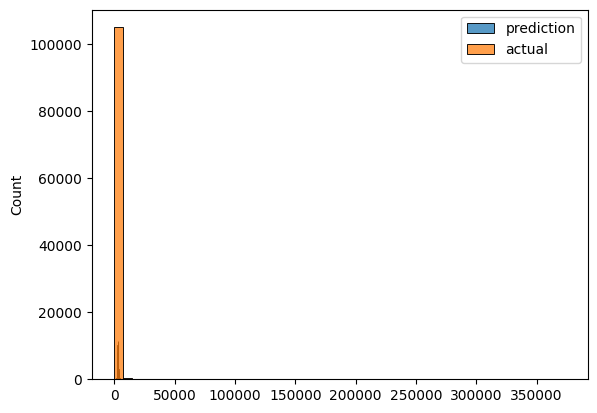

In [ ]:
import seaborn as sns
import matplotlib.pyplot as plt

sns.histplot(y_pred, label='prediction', bins=50)
sns.histplot(y_train, label='actual', bins=50)

plt.legend()

In [ ]:
# try lasso
lasso = Lasso(alpha=0.01)
lasso.fit(X_train, y_train)

y_pred = lasso.predict(X_train)

mean_squared_error(y_train, y_pred, squared=False)

/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_coordinate_descent.py:631: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 2.451e+09, tolerance: 3.921e+07
  model = cd_fast.enet_coordinate_descent(


1871.0231392138191

In [ ]:
# try ridge
ridge = Ridge(alpha=0.01)
ridge.fit(X_train, y_train)

y_pred = ridge.predict(X_train)

mean_squared_error(y_train, y_pred, squared=False)

1871.0187182742277